# Workshop 3: Overfitting and Underfitting with Regularisation

## What you need to do before workshop 

Before you begin with the workshop exercises, it is important for you to complete all the activities of the first week of Module 3A. It will help you to understand and apply your learning. 

#### Optional

To refresh your Python skills, go to the 'course resources' section in the 'Welcome to the course' module.

## Guide to use Jupyter Notebook


### What is Jupyter Notebook?

The Jupyter Notebook is a powerful tool for interactively developing and presenting programming exercises and assignments. 

A Jupyter Notebook consists of the code and its output into a single document. In a single document, you can combine visualisations, narrative text, mathematical equations, and codes to explain the exercise. You'll be able to run the code, display the output, and also add explanations, formulas, charts in a notebook and make the exercise more transparent, and understandable.


### What is .ipynb file?

Each .ipynb file is one Jupyter notebook and gets this .ipynb extension. If you create or download a new notebook, a new  .ipynb file will be created or downloaded. 


### Jupyter Notebook Interface

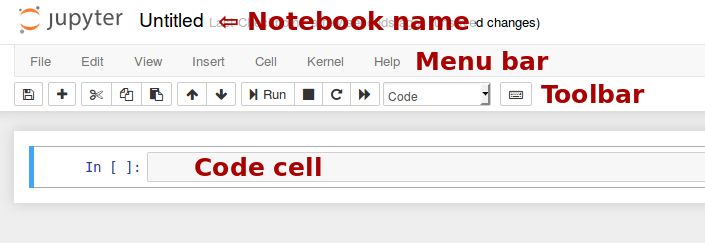



There are two fairly prominent terms that you should understand: cells and kernels. 

A kernel is a “computational engine” that executes the code contained in a notebook document.
A cell is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.


### Cells

Cells form the body of a notebook. The notebook consists of a sequence of cells. For example, this notebook consists of many  cells. 

There are two main cell types that we will use in this module:

#### Code Cell

A code cell contains code to be executed in the kernel. When the code is run, the notebook displays the output below the code cell that generated it.

#### Markdown Cell

A Markdown cell contains text formatted using Markdown and displays its output in-place when the Markdown cell is run.
Every cell starts off being a code cell, but its type can be changed by using a drop-down on the toolbar (which will be “Code”, initially).
The markdown cell will not give you any output if you run it as it is not a code cell.

#### Run a cell
To run a code cell, click on 'run' button on the toolbar or click cell on the menu bar and select run cells.


You can name a Jupyter Notebook by clicking on 'untitled' on the top of the notebook as shown in the screenshot above. Click on 'save' on the toolbar to save your work. You can download your notebook by clicking on 'file' in the menubar and download it as a notebook with .ipynb extension. 

## Let's get started

This week you learned about the concept of machine learning and its types. You covered linear regression as a simple method of implementing supervised learning. You also explored how to generalise a model to avoid underfitting or overfitting. Let's apply linear regression with a L2 regularisation using Python. 

Note that a function is written in Python to perform each step listed above and returns a value(s) that can be used by another function as an input(s). The assessments are also designed in similar fashion where you'll complete the coding of the functions and ensure that the results are correct.

## 1. Import the needed libraries

The first step is to import the following Python libraries. 

In [1]:
from math import sqrt
from matplotlib import pyplot as plot
from random import seed
from random import randrange
from csv import reader
%matplotlib inline

import functions
import numpy as np

In [2]:
y = np.array([1,2,3])
x = np.array([5,6,7])
print(y+x)
print(y.T*x.T)

[ 6  8 10]
[ 5 12 21]


## 2. Load data/dataset

Recall the steps to machine learning or supervised learning. Any machine learning algorithm needs input data to build a model. Thus,load a CSV file. 

In [3]:
def load_csv(filename, skip = False):
    dataset = list()
    # Opens the file in read only mode
    
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        # Skip the header, if needed
        if skip:
            next(csv_reader, None)
        
        for row in csv_reader:
            dataset.append(row)
            
    return dataset

## 3. Pre-process data: Convert string column to float
Let's pre-process the data. Currently, the rows in the dataset are in string format. So, we're converting the rows from string to float format. This will convert the string column into decimal number (float) and overwrite the data. Note that the function strip() will remove the white spaces from the data.

In [4]:
def string_column_to_float(dataset, column):
    for row in dataset:
        # The strip() function remove white space
        # then convert the data into a decimal number (float)
        # and overwrite the original data
        row[column] = float(row[column].strip())

## 4. Make Prediction

In [5]:
# Input: X (np array), b (number), W (number)
# Output: (number) 

def predict(X, b, W):
    y = X.dot(W) + b
    return y

## 5. Update the weights with the gradients and L2 penality

In [6]:
# Input: X (np array), Y (np array), b (number), W (number), no_of_training_examples (number), learning_rate (number),
#        l2_penality (number)
# Output: b (number), W (number)

# o = x*W +b
# mse = (t-0)**2
# de/do = 2 (t-o) * do/do
# de/dw = de/do * do/dw
# de/dw = 2 (t-o) * X

# reg_loss = loss + L2penalty * reg
# reg = 2 * W

def update_weights(X, Y, b, W, no_of_training_examples, learning_rate, l2_penality):
    #predict
    y_pred = predict(X,b,W)
    #colmpute dradient
    error = Y - y_pred
    dw = (- 2 * (X.T.dot(error)) + l2_penality * 2 * W) / no_of_training_examples
    db = - 2 * np.mean(error) / no_of_training_examples
    
    # update parameters following gradients
    W = W - learning_rate * dw
    b = b - learning_rate * db
    
    return b,W
    

## 6. Linear Regression with L2 (Ridge) Regularisation

In [7]:
# Input: X (np array), Y (np array), iterations (number), learning_rate (number), l2_penality (number)
# Output: b (number), W (number)

def ridge_regression(X, Y, iterations = 1000, learning_rate = 0.01, l2_penality = 1):
    no_of_training_examples, no_of_feature = X.shape
    W = np.zeros(no_of_feature)
    b = 0
    for _ in range(iterations):
        b, W = update_weights(X,Y,b,W,no_of_training_examples,learning_rate,l2_penality)
    return b,W

## 7. Split the dataset into training and test sets

In [8]:
# Input: dataset (csv file instance), split (number)
# Output: X_train (np array), Y_train (np array), X_test (np array), Y_test (np array)

def train_test_split(dataset, split):
    train = []
    train_size = split * len(dataset)
    test = list(dataset)
    
    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop(index))
    
    x_train = []
    y_train = []
    
    for row in train:
        x_train.append(row[0])
        y_train.append(row[-1])
    
    x_test = []
    y_test = []
    
    for row in test:
        x_test.append(row[0])
        y_test.append(row[-1])
    
    x_train = np.array(x_train)
    y_train = np.array(y_train)    
    x_test = np.array(x_test)    
    y_test = np.array(y_test)
    
    x_train = np.expand_dims(x_train, axis=1)
    x_test = np.expand_dims(x_test, axis=1)
    
    return x_train,y_train,x_test,y_test

## 8. Perform regression algorithm on dataset

In [9]:
def evaluate_ridge_regression(dataset, split):
    
    X_train, Y_train, X_test, Y_test = train_test_split(dataset, split)
    print(X_train.shape)
    # Train the model
    
    b, W = ridge_regression(X_train, Y_train, iterations = 10000, l2_penality = 0.01)
    
    # Make a prediction with the model
    
    yhat = predict(X_test, b, W)
        
    print( "Predicted values ", np.round( yhat[:3], 2 ) )
    print( "Real values      ", Y_test[:3] ) 
    print( "Trained W        ", round( W[0], 2 ) )    
    print( "Trained b        ", round( b, 2 ) )
    
    visualise(X_test, Y_test, yhat)

## 9. Visualise the results

In [10]:
def visualise(X_test, Y_test, yhat):
    plot.scatter( X_test, Y_test, color = 'blue' )    
    plot.plot( X_test, yhat, color = 'orange' )    
    plot.title( 'Salary vs Experience' )    
    plot.xlabel( 'Years of Experience' )    
    plot.ylabel( 'Salary' )    
    plot.show()

## 10. Seed the random value

In [11]:
seed(1)

## 11. Load and prepare data

In [12]:
filename = 'salary_data.csv'
dataset = load_csv(filename, True) 

for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

## 12. Evaluate algorithm

(20, 1)
Predicted values  [34721.02 41686.62 53627.65]
Real values       [46205. 43525. 54445.]
Trained W         9950.86
Trained b         21784.9


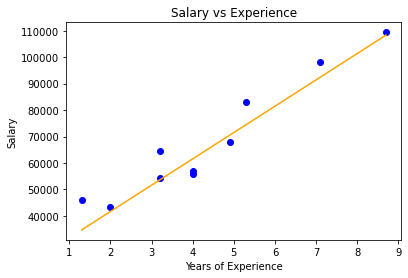

In [13]:
split = 0.66

evaluate_ridge_regression(dataset, split)